<a href="https://colab.research.google.com/github/skar2019/ai-ml/blob/main/Different_Optimizer_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Differnt Optimizer Comparison**

Here's a code example using TensorFlow and Keras to train a simple neural network on the MNIST dataset using multiple optimizers. The code will evaluate each optimizer's performance on the same dataset and print the final accuracy for comparison.

In this example, we'll use SGD, SGD with Momentum, Adagrad, RMSprop, and Adam optimizers.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training with SGD optimizer:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7083 - loss: 1.0936 - val_accuracy: 0.9073 - val_loss: 0.3298
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9088 - loss: 0.3217 - val_accuracy: 0.9247 - val_loss: 0.2571
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9255 - loss: 0.2599 - val_accuracy: 0.9378 - val_loss: 0.2179
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9387 - loss: 0.2138 - val_accuracy: 0.9451 - val_loss: 0.1928
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9473 - loss: 0.1888 - val_accuracy: 0.9482 - val_loss: 0.1733

Training with SGD with Momentum optimizer:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8490 - loss: 0.5001 - val_accuracy: 0.9557 - val_loss: 0.1444
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9609 - loss: 0.1270 - val_accuracy: 0.9620 - val_loss: 0.1189
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step 

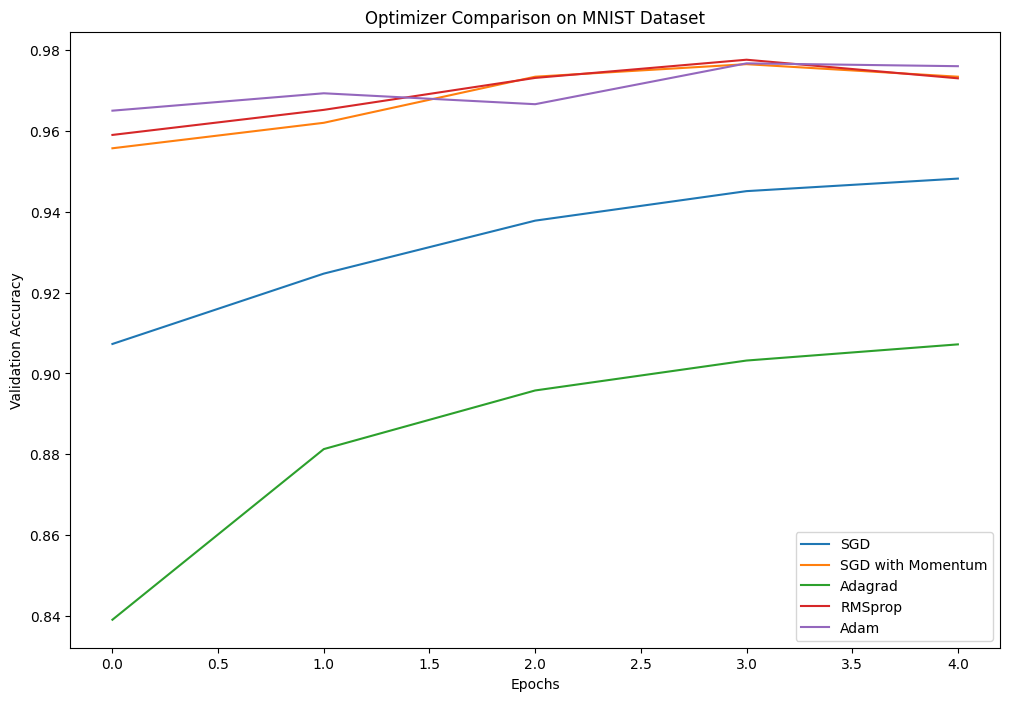

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam
from tensorflow.keras.optimizers import Optimizer
import matplotlib.pyplot as plt

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data

# Define a simple neural network model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Optimizers to test
optimizers = {
    'SGD': SGD(),
    'SGD with Momentum': SGD(momentum=0.9),
    'Adagrad': Adagrad(),
    'RMSprop': RMSprop(),
    'Adam': Adam()
}

# Dictionary to store results
history_results = {}

# Train and evaluate the model with each optimizer
for optimizer_name, optimizer in optimizers.items():
    print(f"\nTraining with {optimizer_name} optimizer:")
    model = create_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        epochs=5,
                        validation_data=(x_test, y_test),
                        verbose=1)

    # Store training history for each optimizer
    history_results[optimizer_name] = history

# Plotting results
plt.figure(figsize=(12, 8))
for optimizer_name, history in history_results.items():
    plt.plot(history.history['val_accuracy'], label=f'{optimizer_name}')

plt.title('Optimizer Comparison on MNIST Dataset')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()
